# Part 1: Analyzing total sales

In [1]:
import pandas as pandas

import matplotlib
import matplotlib.pyplot as pyplot

from datetime import datetime

In [2]:
data_root = "D:/downloads/CompetitionPack/data/raw_from_customer/"

In [3]:
# Reading sales
sales_dir = "sales/"
sales_file = "PMU_Weekly_Sales_2014_2015.csv"
#sales_file = "PMU_Weekly_Sales_2014_2015_sample.csv"
sales_names = ["TouchPoint_Code","Product_Code","Product","SubBrand_Family","Brand_Family","Week","Volume_Sales"]
sales = pandas.read_csv(data_root + sales_dir + sales_file, header = None, names = sales_names)

In [4]:
sales_interesting_columns = ["TouchPoint_Code","Brand_Family","Week","Volume_Sales"]
sales = sales[sales_interesting_columns]
sales.head(1)

,TouchPoint_Code,Brand_Family,Week,Volume_Sales
0,﻿10000017,President,2014-01-06,200.0


In [5]:
sales.size

117890892

In [6]:
#filtering negative sales
sales = sales.query("Volume_Sales > 0")

In [7]:
sales.size

117819424

In [8]:
brand_sales_sum = sales.groupby("Brand_Family")["Volume_Sales"].sum()

In [9]:
print(brand_sales_sum)

Brand_Family
April           7.935396e+07
Bond Street     7.275151e+09
Chesterfield    2.460652e+09
Dubliss         6.160000e+03
Kosmos          2.764580e+07
L&M             1.840235e+09
Marlboro        3.203776e+09
Muratti         2.795397e+08
NEXT/DUBLISS    3.792111e+08
Optima          5.111350e+08
Parliament      2.371590e+09
President       5.378048e+09
Vatra           3.384601e+08
Virginia S      3.040000e+03
Name: Volume_Sales, dtype: float64


## Diagram #1 - Total Sales by Brands

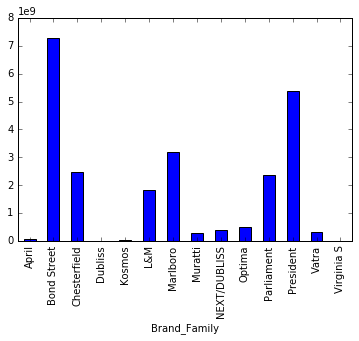

In [10]:
%matplotlib inline
brand_sales_sum.plot.bar()

In [11]:
year_month_series = sales['Week'].apply(lambda x: x[:-3]) # substring from "%Y-%m-%d" to "%Y-%m"
sales_with_monthyear = sales.assign(Year_Month = year_month_series.values)
sales_with_monthyear.head(1)

,TouchPoint_Code,Brand_Family,Week,Volume_Sales,Year_Month
0,﻿10000017,President,2014-01-06,200.0,2014-01


## Diagram #2 - Total Sales by Months

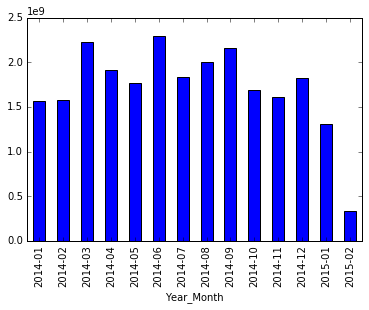

In [12]:
monthly_sales_sum = sales_with_monthyear.groupby("Year_Month")["Volume_Sales"].sum()
monthly_sales_sum.plot.bar()

In [13]:
#Loading data with POS
pos_dir="POS/"
#There are 2 files with POS data
pos_file1="Ret UNI 2015 02 26 closed POS with new columns.xlsx"
pos_file2="Ret UNI 2015 02 27 with new columns.xlsx"

In [14]:
POSes1 = pandas.read_excel(data_root + pos_dir + pos_file1, header = 1)
POSes1.size

1300972

In [15]:
POSes2 = pandas.read_excel(data_root + pos_dir + pos_file2, header = 1)
POSes2.size

3582112

In [16]:
# Filtering only columns, which will be used later
columns_interesting = ["Customer_Code", "Trade_Category","Area"]
POSes1_filtered = POSes1[columns_interesting]
POSes2_filtered = POSes1[columns_interesting]
# Concatenating two DFs
POSes_interesting = pandas.concat([POSes1_filtered, POSes2_filtered])
# Check if concatenation was correct
print(POSes_interesting.size == POSes1_filtered.size + POSes2_filtered.size)

True


In [17]:
POSes_interesting.head(1)

,Customer_Code,Trade_Category,Area
0,80100011,Kiosk,SOUTH


In [18]:
sales_interesting = sales[["TouchPoint_Code", "Volume_Sales"]]
sales_interesting.head(1)

,TouchPoint_Code,Volume_Sales
0,﻿10000017,200.0


In [19]:
sales_in_poses = pandas.merge(sales_interesting, POSes_interesting, 
                              left_on="TouchPoint_Code", right_on="Customer_Code", how='inner')
sales_in_poses.head(1)

,TouchPoint_Code,Volume_Sales,Customer_Code,Trade_Category,Area
0,10000097,1200.0,10000097,Grocery,EAST


## Diagram #3 - Total Sales by POS Categories

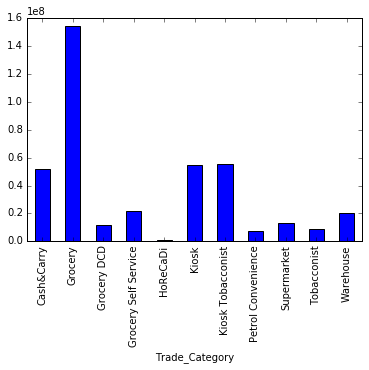

In [20]:
category_sales_sum = sales_in_poses.groupby("Trade_Category")["Volume_Sales"].sum()
category_sales_sum.plot.bar()

## Diagram #4 - Total Sales by Area

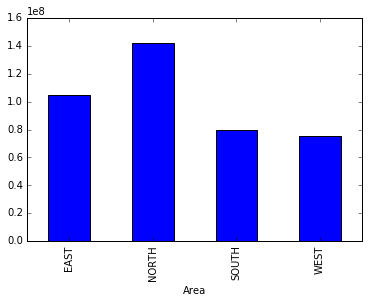

In [21]:
area_sales_sum = sales_in_poses.groupby("Area")["Volume_Sales"].sum()
area_sales_sum.plot.bar()

In [22]:
#Loading Macro Economics Data
external_dir="external/"
external_file="External_Factors 2012-2014.xlsx"
#Columns of interest - ["Customer_Code", "Trade_Category","Area"]

external_data = pandas.read_excel(data_root + external_dir + external_file, header = 0)
#external_data_interesting_columns = ["Month", "Unemployment I", "GDP_per_capita", "Petrol_Price I", "Price of average pack, UAH"]
#external_data = external_data[external_data_interesting_columns]
external_data.head(1)

,Month,Unemployment I,Unemployment II,GDP_per_capita,Consumer_ Price_Index I,Consumer_ Price_Index II,Petrol_Price I,Holiday_1,Industry_Total,PMU,Consumer confidence index (16+ y.o),Exchange rate I,Exchange rate II,"Price of average pack, UAH",Smokers # (excl Crimea),Population (excl. Crimea),"Total Industry Seasonality, excl. Crimea","PMU Seasonality, excl. Crimea",Industry_Total Smoothed
NaN,2012-01-01 04:49:44,9.1,1.9,2139.46,100.2,103.7,10.32,1.0,5558.16766,1647.78958,82.29,8.0351,8.053,8.5,9.6,43.4,0.847294,0.832023,5630.657199


In [23]:
external_data_interesting_columns = ["Month", "Unemployment I", "GDP_per_capita", "Petrol_Price I", "Price of average pack, UAH"]
external_data = external_data[external_data_interesting_columns]
external_data.head(1)

,Month,Unemployment I,GDP_per_capita,Petrol_Price I,"Price of average pack, UAH"
NaN,2012-01-01 04:49:44,9.1,2139.46,10.32,8.5


In [24]:
# Filtering only 2014 year
external_data = external_data.query("Month > datetime(2013, 12, 31)").query("Month < datetime(2015, 1, 1)")

In [25]:
cropped_month = external_data['Month'].apply(lambda x: x.strftime("%Y-%m"))
external_data = external_data.assign(Month = cropped_month.values)
external_data.head(1)

,Month,Unemployment I,GDP_per_capita,Petrol_Price I,"Price of average pack, UAH"
NaN,2014-01,9.4,2315.37,10.85,11.1


In [26]:
# Converting monthly_sales_sum to data frame
monthly_sales_sum = monthly_sales_sum.to_frame().reset_index()
monthly_sales_sum.columns = ['Month', 'Volume_Sales']
monthly_sales_sum.head(3)

,Month,Volume_Sales
0,2014-01,1.572549e+09
1,2014-02,1.577372e+09
2,2014-03,2.229797e+09


In [27]:
monthly_sales_with_external = pandas.merge(monthly_sales_sum, external_data, 
                              left_on="Month", right_on="Month", how='inner')
# We are expecting data for every month in 2014
monthly_sales_with_external.head(12)

,Month,Volume_Sales,Unemployment I,GDP_per_capita,Petrol_Price I,"Price of average pack, UAH"
0,2014-01,1.572549e+09,9.4,2315.37,10.85,11.1
1,2014-02,1.577372e+09,9.4,2315.37,11.05,10.8
2,2014-03,2.229797e+09,9.4,2315.37,12.3,10.9
3,2014-04,1.910717e+09,9,2735.35,14.25,11.1
4,2014-05,1.767462e+09,9,2735.35,15.05,11.0
5,2014-06,2.299966e+09,9,2735.35,15.05,11.1
6,2014-07,1.840678e+09,9.3,3141.82,15.1,11.3
7,2014-08,2.001193e+09,9.3,3141.82,15.98,11.9
8,2014-09,2.165231e+09,9.3,3141.82,16.95,12.2
9,2014-10,1.691092e+09,9.39785,3144.59,16.4,12.4


In [28]:
# simple function for normalizing values.
def normalize(df, columns):
    result = df.copy()
    for column in columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[column] = (df[column] - min_value) / (max_value - min_value)
    return result

In [29]:
normalize_columns = ["Volume_Sales","Unemployment I","GDP_per_capita","Petrol_Price I","Price of average pack, UAH"]
monthly_sales_external_norm = normalize(monthly_sales_with_external, normalize_columns)
monthly_sales_external_norm.head(3)

,Month,Volume_Sales,Unemployment I,GDP_per_capita,Petrol_Price I,"Price of average pack, UAH"
0,2014-01,0.000000,1,0,0,0.125000
1,2014-02,0.006631,1,0,0.0325203,0.000000
2,2014-03,0.903537,1,0,0.235772,0.041667


## Graphic #5 - Sales and Macroeconomics data (normalized)
GDP / Petrol Prices / Pack Prices showed stable growth, while sales have some increases and decreases. Seems like no correlation.


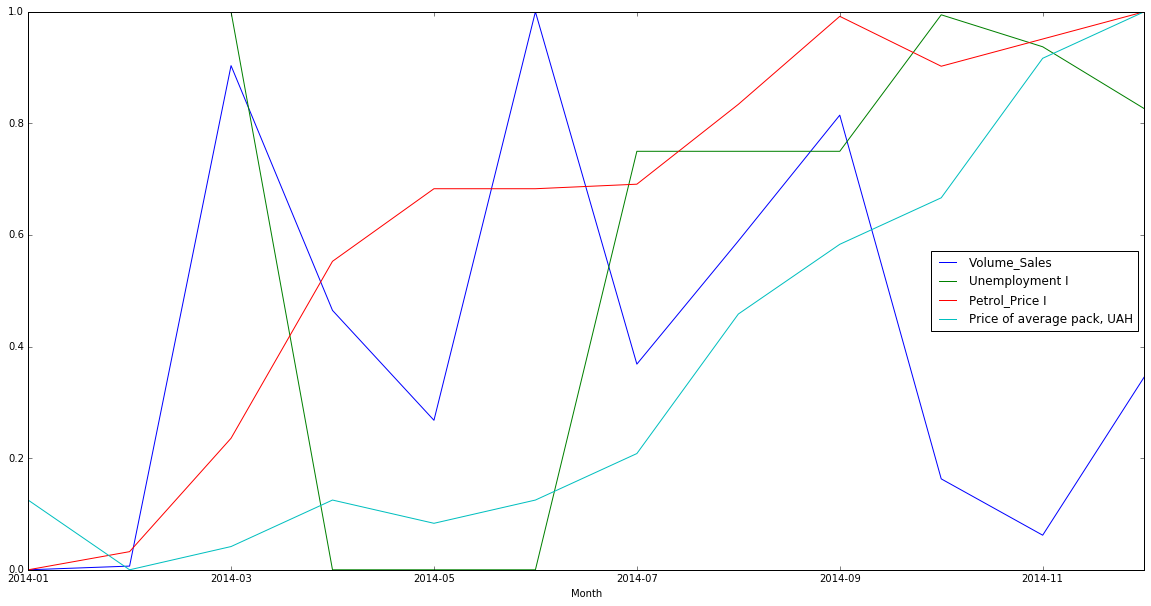

In [30]:
monthly_sales_external_norm.plot(
    x = "Month", 
    y= ["Volume_Sales", "Unemployment I", "Petrol_Price I", "Price of average pack, UAH"],
    figsize=(20,10)
)

## Graphic #5.1 - Sales and Unemployment (normalized)
<p> There are no correlation between two metrics - we could see both month with high sales / high unemployment (March) and high sales / low unemployment (June). But on the other hands we could see, that on some month unemployment growth pairs with sales recession (June - July, September - October).

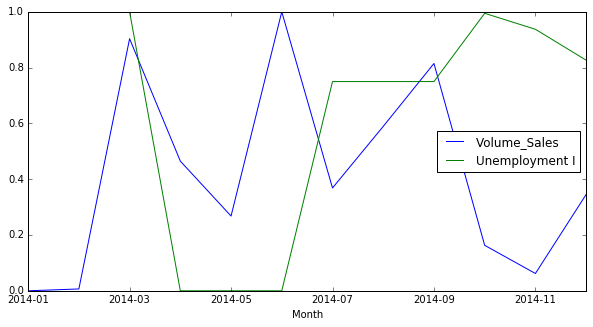

In [31]:
monthly_sales_external_norm.plot(
    x = "Month", 
    y= ["Volume_Sales", "Unemployment I"],
    figsize=(10,5)
)

# Part 2: Analyzing promotionals

In [32]:
#Extracting data for different activities
#Loading data with POS
activities_dir = "activities/"
#There are 2 files with POS data
activities_files = [
    "AVB BOOST_and_PFP_2014.xlsx",
    "CIA_Hostess_data 2014.xlsx",
    "CIA_SA_2014.xlsx",
    #"POSM_movement.xlsx", - it has some different structure
    "PPRP 2014.xlsx",
    "RAP_data 2014.xlsx",
    "TPOSM_2014_data.xlsx"
]                  

act_int_columns = [
    "Brand_NAME", 
    "Touchpoint_Code",
    "Start_Week OR Start_Month",
    "End_Week OR End_Month",
    "Measure"
]

activities = []
for activity_file in activities_files:
    activity = pandas.read_excel(data_root + activities_dir + activity_file, header = 0)
    activity = activity[act_int_columns]
    print(activity.size)
    activities.append(activity)

65345


In [33]:
activities = pandas.concat(activities)
activities.head(1)

,Brand_NAME,Touchpoint_Code,Start_Week OR Start_Month,End_Week OR End_Month,Measure
0,PMI_Portfolio,10000081,2014-05-22,2014-06-05,120


In [34]:
activities.size

65345

In [35]:
activities.dtypes

Brand_NAME                   object
Touchpoint_Code              object
Start_Week OR Start_Month    object
End_Week OR End_Month        object
Measure                       int64
dtype: object

In [36]:
# We need somehow to split week range into separate weeks and divide total measure by weeks count. 
# But for sake of simplicity let's use start_week as week

In [37]:
#Merge sales with activities
sales_and_activities = pandas.merge(sales, activities, 
                              left_on="Week", right_on="Start_Week OR Start_Month", how='left')
sales_and_activities.head(1)

MemoryError: 